In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-51.458448635737824 -140.9753346917306
-87.04827670317123 -48.103169082741005
-75.08839796469593 -106.26944372711452
62.05443233324053 -113.71757340952959
65.17226775327694 -45.82619479490154
-43.38149865347975 -102.41436313073136
56.27304864173186 -15.210148294231857
49.774152945205 149.93464223987053
51.413779540306024 52.14612353846647
53.119186568604846 -113.18327092734411
54.04054536695048 11.28498288178946
-28.751897925162964 39.13593415829695
-51.41766218768096 -68.14796672161005
-14.813565511336193 -148.7218897393848
6.561754361882151 -137.4392010502591
-29.109133126512205 -118.24724110118561
-14.952239276674646 -24.065864995454206
19.28298153648697 -155.77437658728786
-33.71609683509506 157.4037167750542
-11.82753606052168 99.89406258251228
79.7734240082525 36.72215728203247
0.8085501770017487 -125.9978605101223
42.09786523167682 -87.92428819557644
46.57798117761081 86.68442108538699
29.14160450008491 -105.71467683681819
-15.514913431979906 40.574357839748615
23.91383583042378

34.48146335210704 -104.63321958803361
77.36543661253589 -120.24982961377657
40.410313322249635 -32.650402011319386
-4.361162494046752 -1.6833858667770585
33.336250491348224 158.64463883881137
38.12584935632029 -113.6082995126531
-3.2974709439770464 175.02749332330637
-38.04438302721452 168.11655565651654
-52.99884426348638 148.23222172184262
-39.84759920886804 145.34245013104174
13.299774014739555 108.11575565352302
16.002757397862524 137.16631675996462
-27.984784891585484 -119.24517351046171
16.91737954885366 86.89182261784669
-56.87150960905551 56.40298172216177
-69.71810268720111 22.120224355749457
47.81130885252722 86.42042012650728
-84.16145300503014 34.61103665940212
84.88928314889637 -179.36975595014883
-88.20240134316445 -117.01952039646267
53.3535347458606 153.12072559471966
82.72577899704325 -46.09601181081041
77.25247267423683 -43.32964126766629
-71.2092792701254 -103.89699739524906
12.421839793197762 -104.95139201887478
-21.776041132264268 -110.34803892990946
-44.7738638478

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [8]:
import requests
from config import weather_api_key


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | westport
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | tashla
Processing Record 10 of Set 1 | wetaskiwin
Processing Record 11 of Set 1 | grevesmuhlen
Processing Record 12 of Set 1 | inhambane
Processing Record 13 of Set 1 | rio gallegos
Processing Record 14 of Set 1 | mahina
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | port macquarie
Processing Record 19 of Set 1 | labuhan
Processing Record 20 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 21 of Set 1 | prospect heights
Processing Record 22 of Set 1 | baijiantan


Processing Record 40 of Set 4 | arkhipo-osipovka
Processing Record 41 of Set 4 | samusu
City not found. Skipping...
Processing Record 42 of Set 4 | phan rang
City not found. Skipping...
Processing Record 43 of Set 4 | sakakah
Processing Record 44 of Set 4 | wanning
Processing Record 45 of Set 4 | beroroha
Processing Record 46 of Set 4 | makakilo city
Processing Record 47 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 4 | taonan
Processing Record 49 of Set 4 | marcona
City not found. Skipping...
Processing Record 50 of Set 4 | eyl
Processing Record 1 of Set 5 | matara
Processing Record 2 of Set 5 | orsha
Processing Record 3 of Set 5 | katav-ivanovsk
Processing Record 4 of Set 5 | broome
Processing Record 5 of Set 5 | saint-joseph
Processing Record 6 of Set 5 | haines junction
Processing Record 7 of Set 5 | akyab
Processing Record 8 of Set 5 | caravelas
Processing Record 9 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 5 | ime

Processing Record 26 of Set 8 | sur
Processing Record 27 of Set 8 | salinopolis
Processing Record 28 of Set 8 | ayan
Processing Record 29 of Set 8 | karaul
City not found. Skipping...
Processing Record 30 of Set 8 | lugovoy
Processing Record 31 of Set 8 | severnyy-kospashskiy
Processing Record 32 of Set 8 | halalo
City not found. Skipping...
Processing Record 33 of Set 8 | chiknayakanhalli
Processing Record 34 of Set 8 | fort saint james
Processing Record 35 of Set 8 | nishihara
Processing Record 36 of Set 8 | denpasar
Processing Record 37 of Set 8 | puerto escondido
Processing Record 38 of Set 8 | belyy yar
Processing Record 39 of Set 8 | marang
Processing Record 40 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 41 of Set 8 | toamasina
Processing Record 42 of Set 8 | naryan-mar
Processing Record 43 of Set 8 | ovalle
Processing Record 44 of Set 8 | morondava
Processing Record 45 of Set 8 | nkowakowa
Processing Record 46 of Set 8 | tursunzoda
Processing Record 47 of S

Processing Record 13 of Set 12 | seymchan
Processing Record 14 of Set 12 | aswan
Processing Record 15 of Set 12 | kuche
City not found. Skipping...
Processing Record 16 of Set 12 | high level
Processing Record 17 of Set 12 | riyadh
Processing Record 18 of Set 12 | sladkovo
Processing Record 19 of Set 12 | alice springs
Processing Record 20 of Set 12 | dudinka
Processing Record 21 of Set 12 | amurzet
Processing Record 22 of Set 12 | broken hill
Processing Record 23 of Set 12 | altay
Processing Record 24 of Set 12 | shahgarh
Processing Record 25 of Set 12 | guanay
Processing Record 26 of Set 12 | mitu
Processing Record 27 of Set 12 | viedma
Processing Record 28 of Set 12 | southbridge
Processing Record 29 of Set 12 | severnyy
Processing Record 30 of Set 12 | assai
Processing Record 31 of Set 12 | yatou
Processing Record 32 of Set 12 | narok
Processing Record 33 of Set 12 | biak
Processing Record 34 of Set 12 | maceio
Processing Record 35 of Set 12 | tymovskoye
Processing Record 36 of Set

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df['Lat'] =city_data_df['Lat'].round(decimals = 2)
city_data_df['Lng'] =city_data_df['Lng'].round(decimals = 2)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,72.88,75,2,14.50,PF,2022-09-21 20:23:06
1,Ushuaia,-54.80,-68.30,47.86,57,40,11.50,AR,2022-09-21 20:21:39
2,Punta Arenas,-53.15,-70.92,57.31,47,0,14.97,CL,2022-09-21 20:20:08
3,Yellowknife,62.46,-114.35,55.92,67,75,19.57,CA,2022-09-21 20:23:07
4,Qaqortoq,60.72,-46.03,42.85,73,28,3.47,GL,2022-09-21 20:23:07


In [13]:
new_column_order=["City","Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [14]:
city_data_df =city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-09-21 20:23:06,-23.12,-134.97,72.88,75,2,14.50
1,Ushuaia,AR,2022-09-21 20:21:39,-54.80,-68.30,47.86,57,40,11.50
2,Punta Arenas,CL,2022-09-21 20:20:08,-53.15,-70.92,57.31,47,0,14.97
3,Yellowknife,CA,2022-09-21 20:23:07,62.46,-114.35,55.92,67,75,19.57
4,Qaqortoq,GL,2022-09-21 20:23:07,60.72,-46.03,42.85,73,28,3.47


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1663792782.1156101

In [18]:
today=time.strftime("%x")
today

'09/21/22'

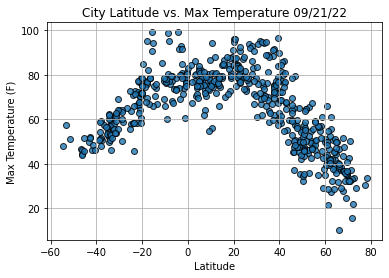

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

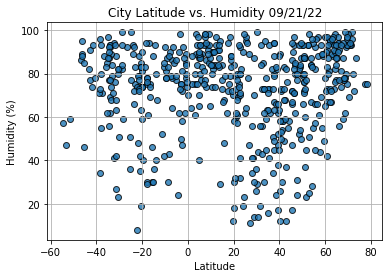

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

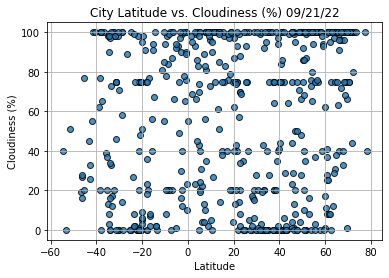

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

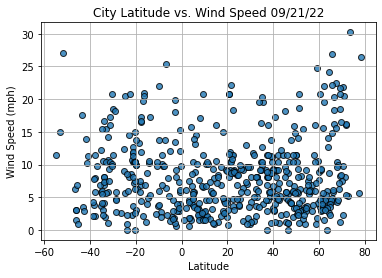

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                       Mahina
Country                        PF
Date          2022-09-21 20:22:16
Lat                        -17.51
Lng                       -149.49
Max Temp                    82.17
Humidity                       61
Cloudiness                     20
Wind Speed                   6.91
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Yellowknife,CA,2022-09-21 20:23:07,62.46,-114.35,55.92,67,75,19.57
4,Qaqortoq,GL,2022-09-21 20:23:07,60.72,-46.03,42.85,73,28,3.47
6,Westport,US,2022-09-21 20:23:08,41.14,-73.36,81.45,58,0,9.22
7,Vostok,RU,2022-09-21 20:23:08,46.49,135.88,37.45,71,1,5.46
8,Tashla,RU,2022-09-21 20:23:09,51.77,52.74,64.51,23,99,6.31


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

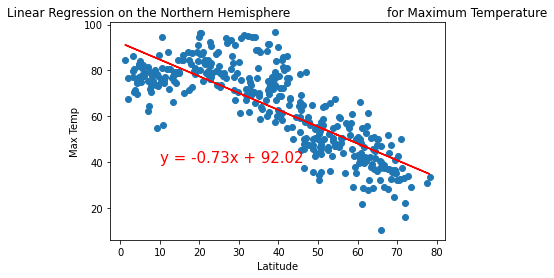

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

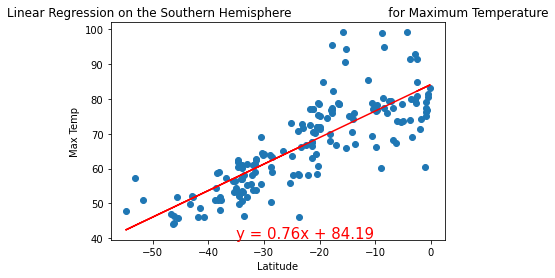

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-35,40))

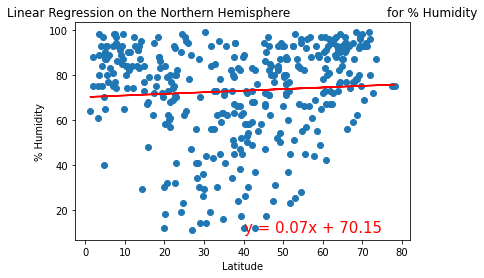

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

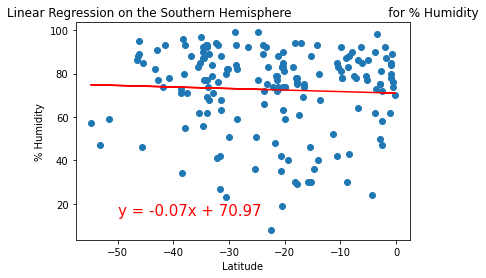

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

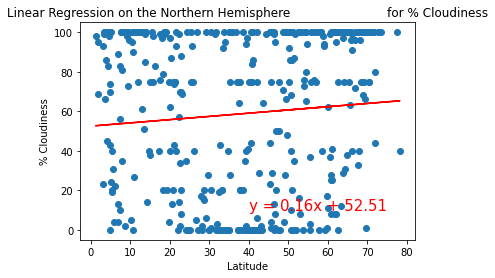

In [32]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

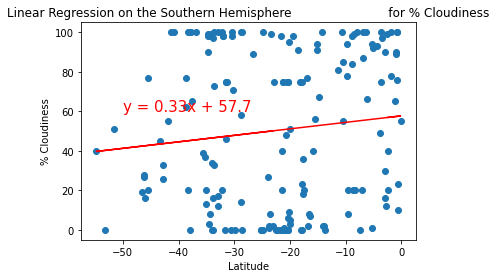

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

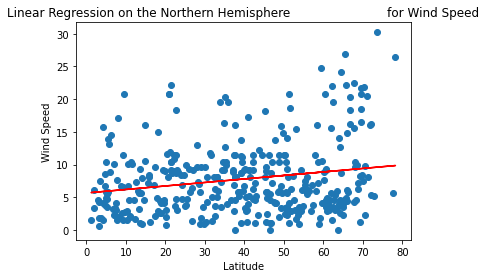

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

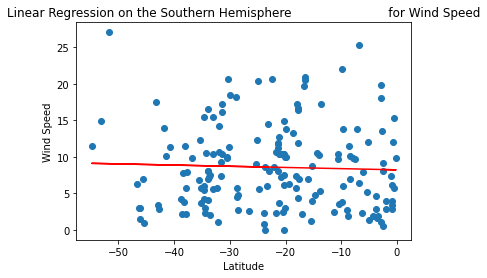

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))